<a href="https://colab.research.google.com/github/Sateesh110/Rep_ML/blob/master/zFE_Unique_Values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FE 

## Import Packages

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# boston house dataset for the demo
from sklearn.datasets import load_boston

##Source Data

In [3]:
data = pd.read_csv('https://www.openml.org/data/get_csv/16826755/phpMYEkMl')
data.head(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"


In [71]:
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)[[
                          'RM', 'LSTAT', 'CRIM'
                      ]]

boston.head()

,RM,LSTAT,CRIM
0,6.575,4.98,0.00632
1,6.421,9.14,0.02731
2,7.185,4.03,0.02729
3,6.998,2.94,0.03237
4,7.147,5.33,0.06905


## String Replace

In [4]:
df = data.replace("?",np.nan)
df2 = df.copy()
df.head(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


## Column Extract

In [5]:
def get_first_cabin(row):
    try:
        return row.split()[0]
    except:
        return np.nan

In [6]:
df['cabin'] = df['cabin'].apply(get_first_cabin)
df.head(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


## Column Split

In [11]:
df2[['Cabib_A', 'Cabin_B']] = df2['cabin'].str.split(' ', 1, expand=True)
df2.head(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,Cabib_A,Cabin_B
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",B5,None
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",C22,C26
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",C22,C26


##Unique Values|Cardinality

In [48]:
#Cardinality refers to the number of unique categories in each variable. Thus, the cardinality of the variable gender, which takes the values 'male' and 'female' is 2, whereas the cardinality of the variable civil status, which takes values 'married', 'divorced', 'single' and 'widow' is 4.

In [15]:
#Unique Values
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [16]:
#Uniues values count
df['sex'].nunique()

2

In [19]:
#Unique Values count two columns
df[['sex','cabin']].nunique()

sex        2
cabin    181
dtype: int64

In [20]:
#Unique values for entire table 
col = df.columns
df[col].nunique()

pclass          3
survived        2
name         1307
sex             2
age            98
sibsp           7
parch           8
ticket        929
fare          281
cabin         181
embarked        3
boat           27
body          121
home.dest     369
dtype: int64

In [22]:
# Number of records for each unqiue values
df['sex'].value_counts()

male      843
female    466
Name: sex, dtype: int64

In [29]:
# Number of records for column combination
df[['survived','sex']].value_counts()

survived  sex   
0         male      682
1         female    339
          male      161
0         female    127
dtype: int64

In [30]:
# Number of records for column combination
df[['sex','survived']].value_counts()

sex     survived
male    0           682
female  1           339
male    1           161
female  0           127
dtype: int64

In [46]:
# nunique() ignores missing data by default. If we want to consider missing values as an additional category
# we need to explicitly mention so, passing the argument dropna=False

df['embarked'].nunique(dropna=False)

4

In [47]:
df['embarked'].unique()

array(['S', 'C', nan, 'Q'], dtype=object)

##Missing Values

In [38]:
# Number of missing values
df['age'].isnull().sum()

263

In [37]:
# Number of missing values in each column
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [39]:
#Pecentange of missing values 
df.isnull().mean()*100

pclass        0.000000
survived      0.000000
name          0.000000
sex           0.000000
age          20.091673
sibsp         0.000000
parch         0.000000
ticket        0.000000
fare          0.076394
cabin        77.463713
embarked      0.152788
boat         62.872422
body         90.756303
home.dest    43.086325
dtype: float64

##Frequency of Unique Values

In [54]:
#Calculate the frequency for each unique value 
print(df['sex'].value_counts())
print(len(df))

male      843
female    466
Name: sex, dtype: int64
1309


In [58]:
label_freq = df['sex'].value_counts()/len(df)*100
label_freq
#64.4% were males ; 35.6% were females

male      64.400306
female    35.599694
Name: sex, dtype: float64

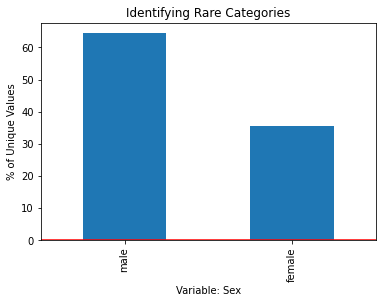

In [63]:
fig = label_freq.sort_values(ascending=False).plot.bar()
fig.axhline(y=0.05, color='red')
fig.set_ylabel('% of Unique Values')
fig.set_xlabel('Variable: Sex')
fig.set_title('Identifying Rare Categories')
plt.show()

##Outliers

Text(0.5, 1.0, 'Boxplot')

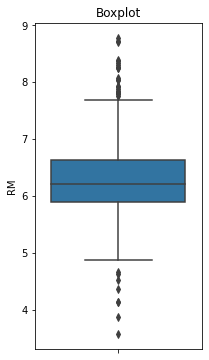

In [72]:
# boxplot
# y should be numeric value
plt.figure(figsize=(3,6))
sns.boxplot(y=boston['RM'])
plt.title('Boxplot')

In [75]:
# Function to get upper & lower boundaries


def find_boundaries(df, variable, distance):

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [74]:
upper_boundary, lower_boundary = find_boundaries(boston, 'RM', 1.5)
upper_boundary, lower_boundary

(7.730499999999999, 4.778500000000001)

In [81]:
# let's flag the outliers in the data set

outliers = np.where(boston['RM'] > upper_boundary, True,
                    np.where(boston['RM'] < lower_boundary, True, False))

# how many outliers did we find?
outliers.sum()

30

In [82]:
outliers_df = boston.loc[outliers, 'RM']
outliers_df.head()

97     8.069
98     7.820
162    7.802
163    8.375
166    7.929
Name: RM, dtype: float64